In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')
from functools import reduce

In [5]:
KT1 = pd.read_feather('C:/Users/PC1/Desktop/HASEEB August 2021/KT1.ftr')

K1_userid_counts = KT1.user_iD.value_counts()
mask = K1_userid_counts >= 30
KT1_userids = mask[mask].index

K1 = KT1[KT1.user_iD.isin(KT1_userids)]

In [6]:
KT3 = pd.read_feather('C:/Users/PC1/Desktop/HASEEB August 2021/KT3.ftr')
questions_df = pd.read_csv('C:/Users/PC1/Desktop/HASEEB August 2021/questions.csv')
Users = pd.read_feather('C:/Users/PC1/Desktop/HASEEB August 2021/Output.ftr')

In [7]:
K1['elapsed_time']= K1.elapsed_time.div(1000)   #DIVDING THE ELAPSED TIME by 1000 to further check the mean elapsed time by each user

In [8]:
K1.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,user_iD
0,1565096190868,1,q5012,b,38.0,1
1,1565096221062,2,q4706,c,24.0,1
2,1565096293432,3,q4366,b,68.0,1
3,1565096339668,4,q4829,a,42.0,1
4,1565096401774,5,q6528,b,59.0,1


In [9]:
K1['elapsed_time'].describe()

count    2.937368e+07
mean     2.823671e+01
std      8.227296e+01
min      0.000000e+00
25%      1.700000e+01
50%      2.300000e+01
75%      3.266600e+01
max      1.782080e+05
Name: elapsed_time, dtype: float64

In [25]:
print(len(K1.elapsed_time))

29373679


In [10]:
Elapsed_time= K1.groupby('user_iD' , sort=False)['elapsed_time'].median()

In [11]:
Elapsed_time.to_csv('Elapsedtime.csv')

In [12]:
Times = pd.read_csv('Elapsedtime.csv')

In [13]:
Times.head()

,user_iD,elapsed_time
0,1,36.75
1,100,34.50
2,1000,34.00
3,10004,25.00
4,100043,35.00


In [26]:
print(len(Times.elapsed_time))


61103


In [14]:
Times["elapsed_time"].describe()

count    61103.000000
mean        23.245063
std          6.933344
min          0.000000
25%         19.000000
50%         22.000000
75%         26.000000
max        356.500000
Name: elapsed_time, dtype: float64

In [16]:
dfs = [Users, Times]
df = reduce(lambda left,right: pd.merge(left,right,on='user_iD'), dfs)

In [17]:
df.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,1,1082,753,329,69.593346,36.75
1,100,33,18,15,54.545455,34.50
2,1000,1488,930,558,62.500000,34.00
3,10004,2486,1790,696,72.003218,25.00
4,100043,714,328,386,45.938375,35.00


In [18]:
df.to_feather('UsersPerformance.ftr')

In [19]:
df["Total Questions Attempted"].describe()

count    61100.000000
mean       480.745876
std       1004.493383
min         30.000000
25%         61.000000
50%        149.000000
75%        455.000000
max      34379.000000
Name: Total Questions Attempted, dtype: float64

In [20]:
df["elapsed_time"].describe()

count    61100.000000
mean        23.245210
std          6.933314
min          0.000000
25%         19.000000
50%         22.000000
75%         26.000000
max        356.500000
Name: elapsed_time, dtype: float64

In [29]:
ET = df.loc[df['elapsed_time'] == 0.000000 ]

In [30]:
ET.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
5122,250318,102,67,35,65.686275,0.0
5695,253835,327,174,153,53.211009,0.0
6613,261909,32,19,13,59.375000,0.0
7628,271250,84,60,24,71.428571,0.0
8274,276400,75,47,28,62.666667,0.0


In [31]:
len(ET)

94

In [32]:
ET

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
5122,250318,102,67,35,65.686275,0.0
5695,253835,327,174,153,53.211009,0.0
6613,261909,32,19,13,59.375000,0.0
7628,271250,84,60,24,71.428571,0.0
8274,276400,75,47,28,62.666667,0.0
8381,277018,117,76,41,64.957265,0.0
8534,278226,46,26,20,56.521739,0.0
8538,278244,73,45,28,61.643836,0.0
8555,278382,34,18,16,52.941176,0.0
8556,278388,52,35,17,67.307692,0.0


In [43]:
df_90 = df.loc[df['Percentage'] >= 90]

In [35]:
len(df_90)

119

<AxesSubplot:xlabel='user_iD'>

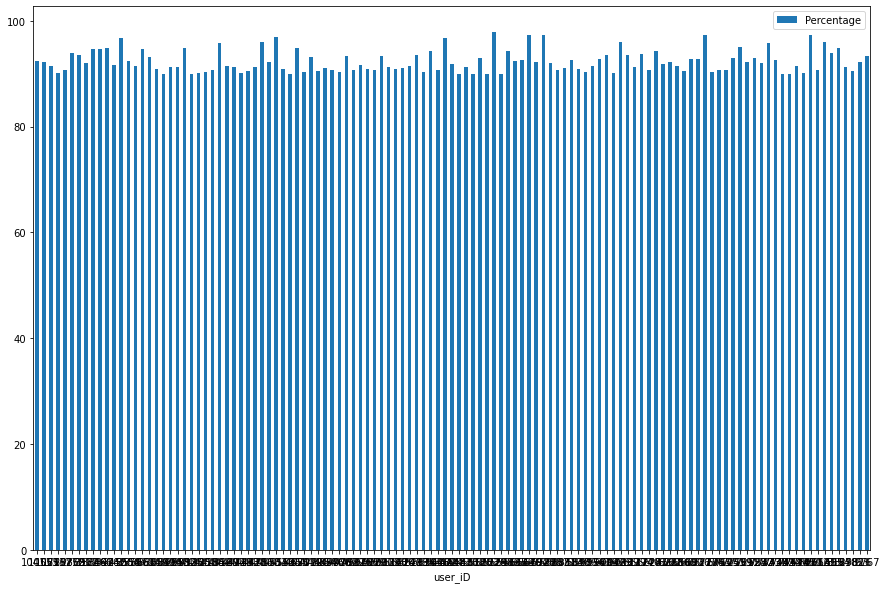

In [34]:
df_90.plot(x="user_iD", y=["Percentage"], kind="bar",figsize=(15,10) , rot=0)

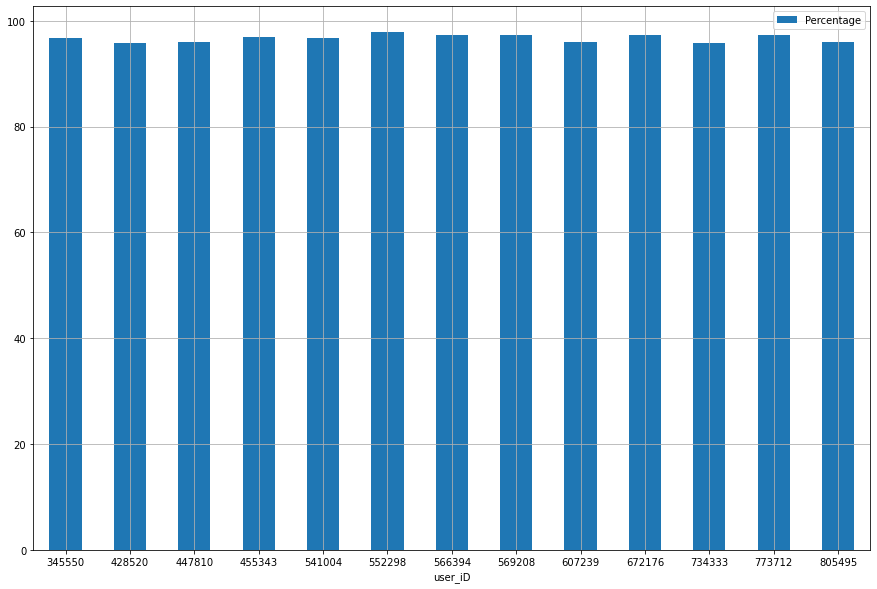

In [40]:
df_95 = df.loc[df['Percentage'] >= 95]
df_95.plot(x="user_iD", y=["Percentage"], kind="bar",figsize=(15,10) , rot=0).grid()

In [44]:
df_95

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
13980,345550,30,29,1,96.666667,11.5
23052,428520,47,45,2,95.744681,21.0
25036,447810,100,96,4,96.000000,21.0
25871,455343,32,31,1,96.875000,18.0
35341,541004,31,30,1,96.774194,14.0
36680,552298,46,45,1,97.826087,21.0
38215,566394,111,108,3,97.297297,22.0
38540,569208,36,35,1,97.222222,22.0
42304,607239,127,122,5,96.062992,16.0
48052,672176,37,36,1,97.297297,15.0
